In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

# Linearna regresija

#### Linearna regresija predstavlja metod za pronalaženje trenda u podacima.
#### Trend je zavisnost obilka $f(x)=y$ gde x može da bude jedna vrednost ili vektor vrednosti, a y je ciljna promenjljiva.
#### Ciljna promenjljiva je promenjljiva čije vrednosti želimo da predvidimo ili proučimo.
#### Trend nam daje mogućnost da objasnimo na koji način x zavisi od y kao i da predvidimo y na osnovu x.

#### Recimo da imamo skup podataka sa 280 kuća za koje imamo površinu u kvadratnim metrima i cenu.
#### Želimo da vidimo da li postoji zavisnost (trend) između površine i cene.
#### Prvo učitavamo skup podataka.

In [5]:
df = pd.read_excel('houses.xls')

In [6]:
df.shape

(280, 2)

In [7]:
df.head()

,price,lotsize(m^2)
0,74700,658.4799
1,85000,652.4388
2,68500,650.5800
3,82900,650.5800
4,86000,641.2860


#### Vidimo da naš skup podataka sadrži informacije o površini (lotsize(m^2)) i ceni (price).
#### Pošto smo odlučili da je naš zadatak da objasnimo kako cena zavisi od povrišine onda ćemo reći da je za nas x=površina, a y=cena.
#### Prikazujemo grafik tačaka (x,y).

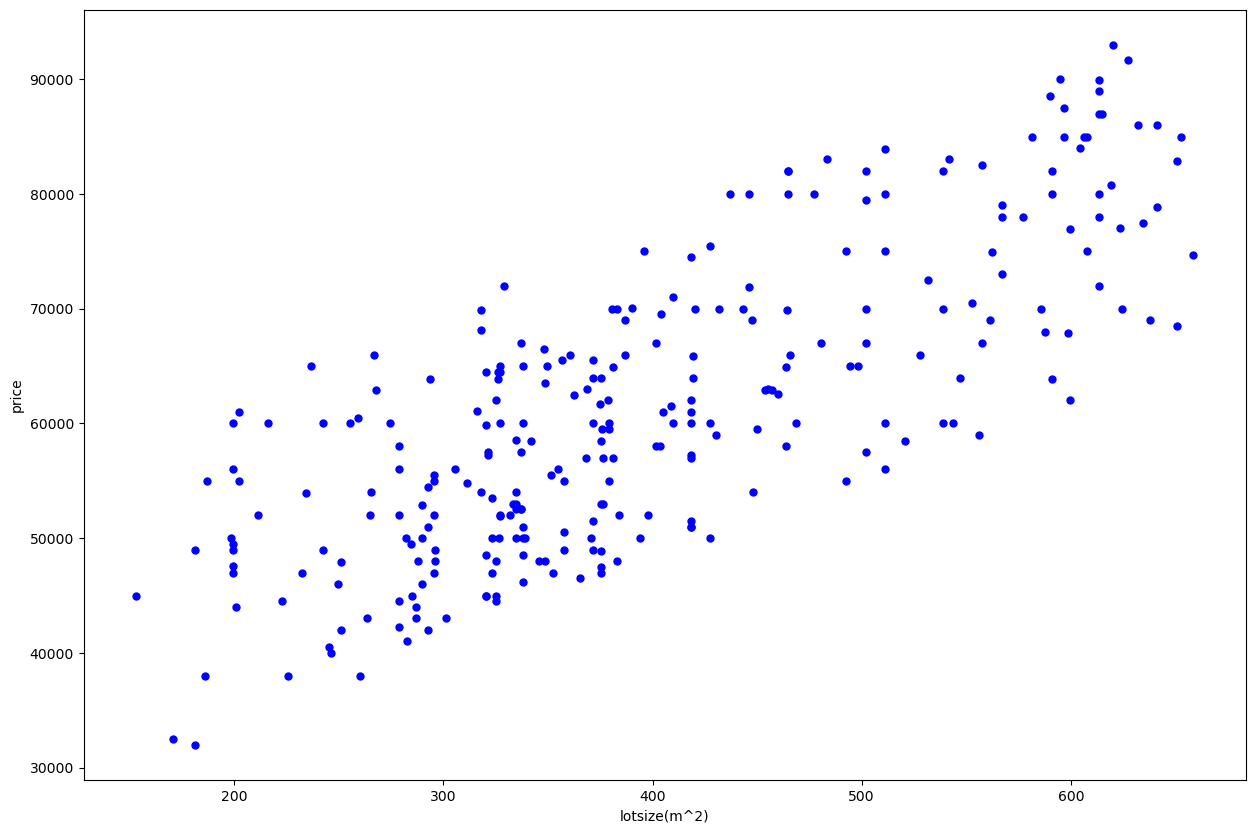

In [9]:
from regression_tools import plot_points

plot_points(df['lotsize(m^2)'],df['price'],'lotsize(m^2)','price')

#### Sa grafika se može videti da postoji trend koji liči na pravu liniju, odnosno zavisnost oblika cena = k*površina + n.
#### Linearna regresija je metod koji će nam odrediti taj trend.
#### Prikazujemo za početak rezultat linearne regresije, a kasnije je detaljno objašnjavamo.

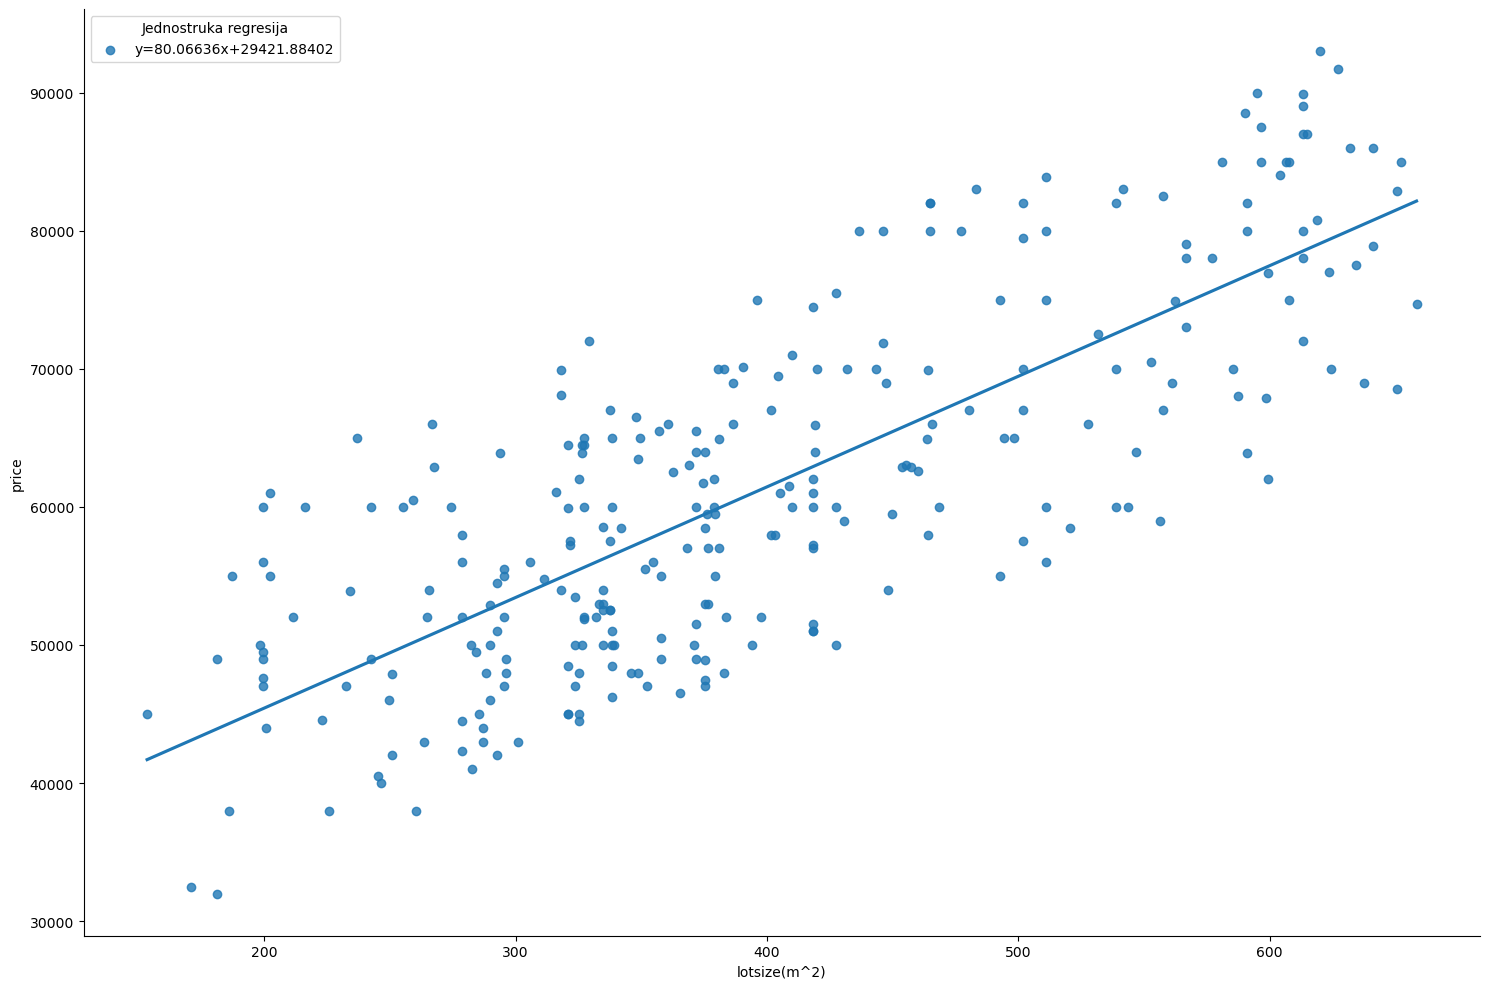

In [11]:
from regression_tools import simple_linear_regression

simple_linear_regression(df,'lotsize(m^2)','price')

#### Vidimo da je rezultat cena = 80.06 * površina + 29421.8
#### Šta bi se dogodilo da smo na grafiku videli trend koji je obilka kvadratne fukcije ili slično? Da li bismo mogli da ga odredimo pomoću linearne regresije?
#### Termin "linearna" ne znači da je rezultat regresije prava odnosno linearna funkcija, već da je rezultat regresije linearna kombinacija koeficijenata i nekih funkcija. Funkcije se zadaju, a koeficijenti određuju.
#### Na primer, prava je linearna kombinacija koeficijenata $k$ i $n$ i fukcija $f(x)=x$ i $f(x)=1$, dok je polinom drugog stepena linearna kombinacija koeficijenata $a$, $b$ i $c$ i fukcija $f(x)=x^2,f(x)=x$ i $f(x)=1$

#### Pre nego što krenemo u detaljno objašnjavanje linearne regresije pokazaćemo još jedan primer koji Vas može dodatno motivisati da učite o ovoj temi.

## Motivacioni primer

#### Kao jedan od primera upotrebe regresije uzećemo predikciju ishoda utakmica u Premier ligi.
#### Tim koji stoji iza sajta http://www.football-data.co.uk/ , želeo je da napravi model za “fer” kvote za utakmice. "Fer” znači da nemaju cilj da zarde od tuđeg klađenja (kao kladionice).
#### Krenuli su sa jednostavnim pristupom, da je dobar indikator kvaliteta tima razlika u golovima (RG)= broj datih golova - broj primljenih golova na prethodno odigranim utakmicama. 
#### Odabrali su da posmatraju 6 prethodno odigranih utakmica.
#### Na taj način kreirali su indikator koji su nazvali rejting utakmice (match rating, MR).
#### MR=RG_domaći_tim-RG_gostujući_tim
#### Npr. Ako igraju Manchester-Liverpool; Man. ima RG=+5, a Liv. RG=+2, MR=5-2=3.
#### Da bi kreirali svoj model posmatrali su mečeve odigrane u periodu 1993-2001. Za svaki meč zabeležili su MR i ishod meča.
#### Nakon toga su podatke organizovali po rejtingu i za svaki rejting izračunali su %pobeda_domaćina (%PD), %pobeda_gosta (%PG), %izjednačeno (%I).
#### U slećem redu učitavamo njihove podatke iz csv (comma separated values) fajla. 
#### Kolone su redom: MR, Broj pobeda domaćeg, Broj pobeda gostujućeg, Broj izjednačenih, %pobeda_domaćina (%PD), %pobeda_gosta (%PG), %izjednačeno (%I)

In [16]:
import pandas as pd

data=pd.read_csv('fudbal.csv', sep=',')

In [17]:
data.head()

,Match_rating,Number_of_home_wins,Number_of_draws,Number_of_away_wins,%_of_home_wins,%_of_home_draws,%_of_away_wins
0,-26,0,1,1,0.00%,50.00%,50.00%
1,-23,0,0,2,0.00%,0.00%,100.00%
2,-22,0,0,3,0.00%,0.00%,100.00%
3,-21,0,2,4,0.00%,33.30%,66.70%
4,-20,2,2,7,18.20%,18.20%,63.60%


In [18]:
data['%_of_home_wins']=data['%_of_home_wins'].apply(lambda x: float(x.split('%')[0]))
data['%_of_home_draws']=data['%_of_home_draws'].apply(lambda x: float(x.split('%')[0]))
data['%_of_away_wins']=data['%_of_away_wins'].apply(lambda x: float(x.split('%')[0]))

data['Match_rating']=data['Match_rating'].astype(float)

data.head()

,Match_rating,Number_of_home_wins,Number_of_draws,Number_of_away_wins,%_of_home_wins,%_of_home_draws,%_of_away_wins
0,-26.0,0,1,1,0.0,50.0,50.0
1,-23.0,0,0,2,0.0,0.0,100.0
2,-22.0,0,0,3,0.0,0.0,100.0
3,-21.0,0,2,4,0.0,33.3,66.7
4,-20.0,2,2,7,18.2,18.2,63.6


#### Nakon toga kreirali su regresione funkcije (modele) za %PD, %PG i %I, koristeći rejting meča kao x.
#### Sa ciljem da kad je poznat MR imaju funkciju na osnovu koje će da predvide %PD, %PG i %I.
#### Kada su imali procente jednostavno su 100 podelili sa svakim od njih i tako dobili kvote za PD, PG i I.
#### Npr. ako bi procenat pobede domaćina bio 46.7%, kvota bi bila 100/46.7=2.15
#### U nastavku ponavljamo postupak kreiranja regresionih funkcija, a nakon toga objašnjavamo se potrebne teorijske koncepte.

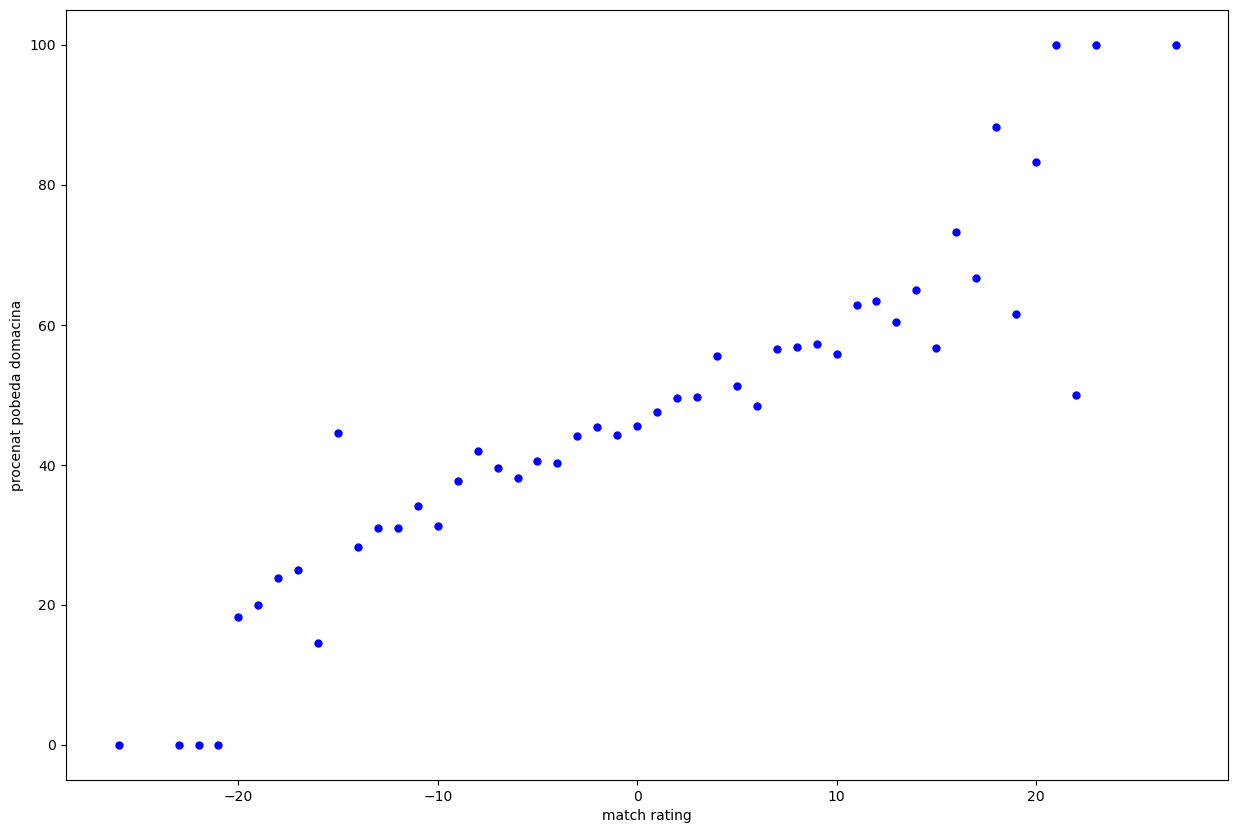

In [20]:
match_rating = data['Match_rating']

procenat_pobeda_domacina = data['%_of_home_wins']

plot_points(match_rating,procenat_pobeda_domacina,'match rating','procenat pobeda domacina')

In [21]:
from regression_tools import lsquares

x=match_rating
y=procenat_pobeda_domacina

p=lsquares(x, y, 1)
print(p)

[ 1.56148751 46.46609209]


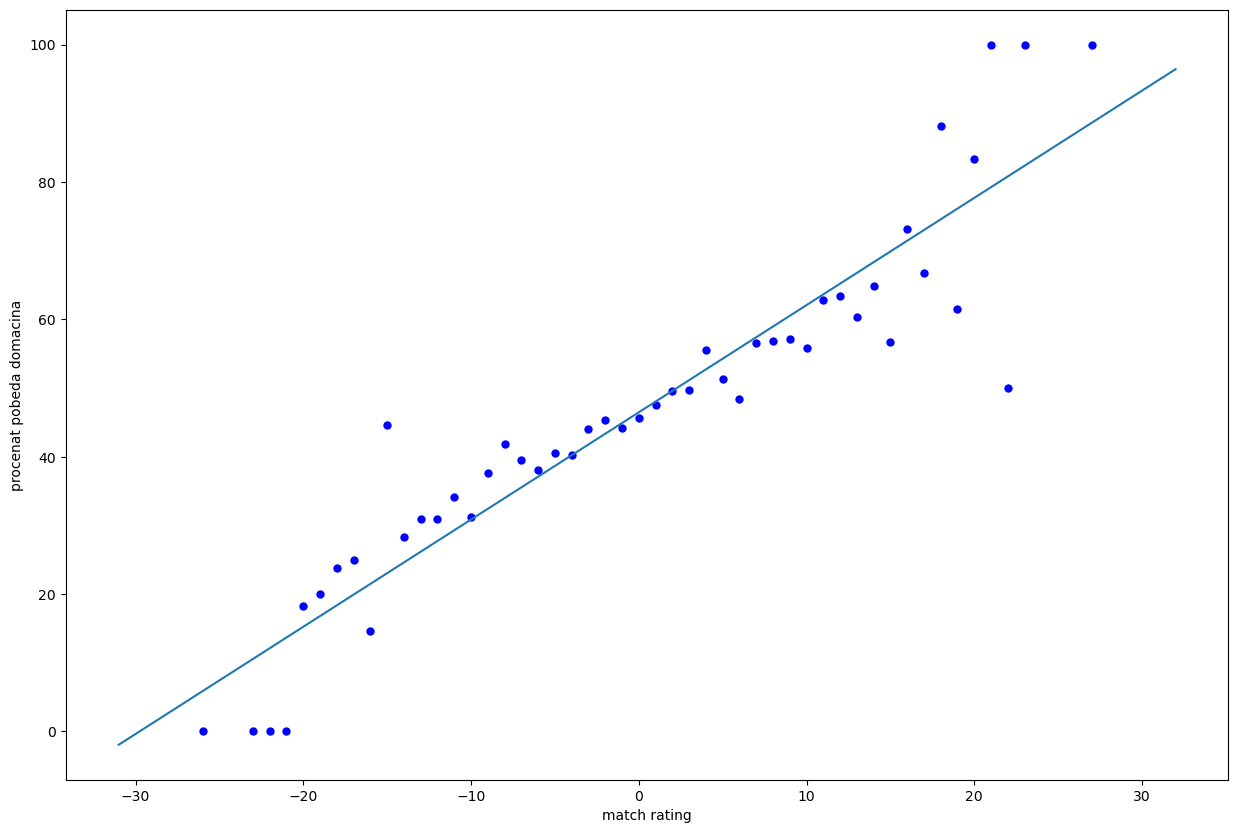

In [22]:
plot_points(x,y,'match rating','procenat pobeda domacina')

xp=np.linspace(np.min(x)-5,np.max(x)+5,100);
plt.plot(xp,np.polyval(p,xp))

In [23]:
#ako je mr 15 kolike su sanse da pobedi domaci tim.
print(np.polyval(p,15))

69.88840469674949


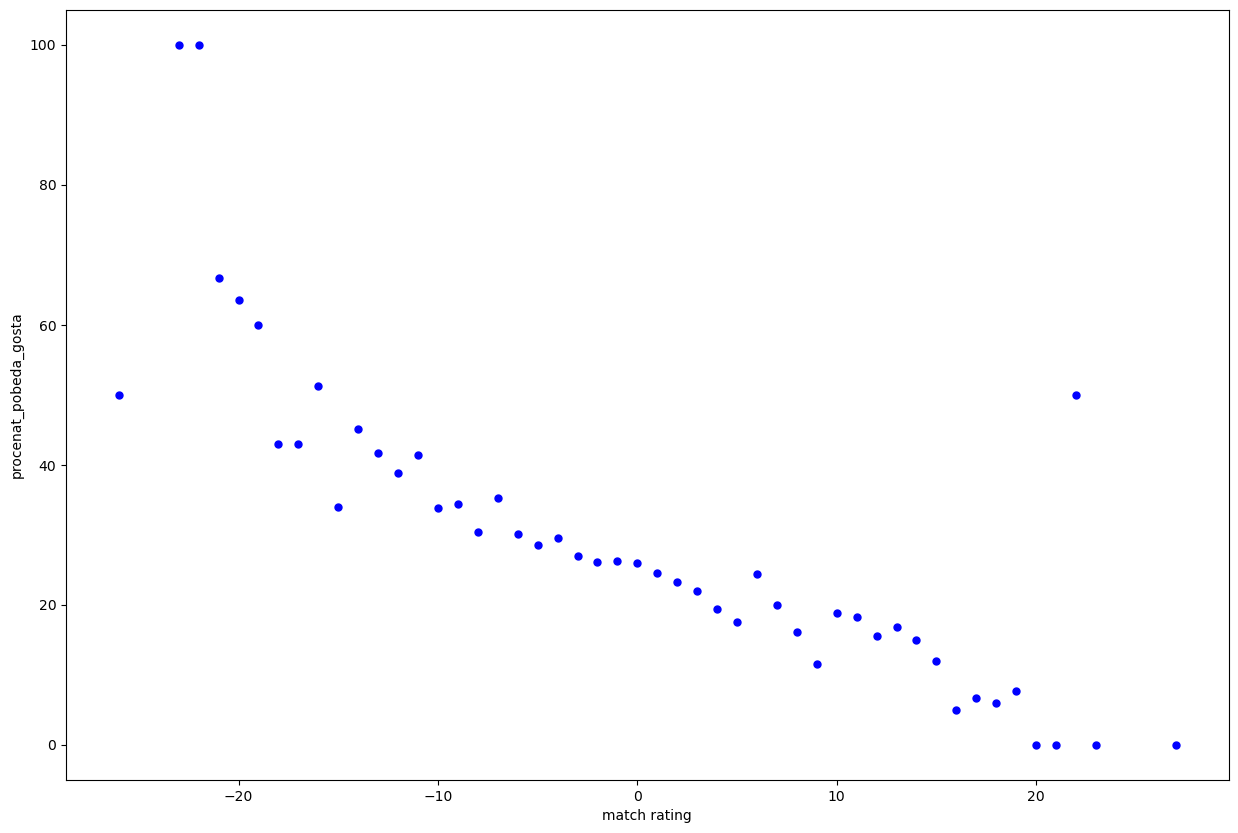

In [24]:
match_rating = data['Match_rating']
procenat_pobeda_gosta = data['%_of_away_wins']
plot_points(match_rating,procenat_pobeda_gosta,'match rating','procenat_pobeda_gosta')

In [25]:
x=match_rating
y=procenat_pobeda_gosta

p=lsquares(x, y, 1)
print(p)

[-1.26909739 29.73610403]


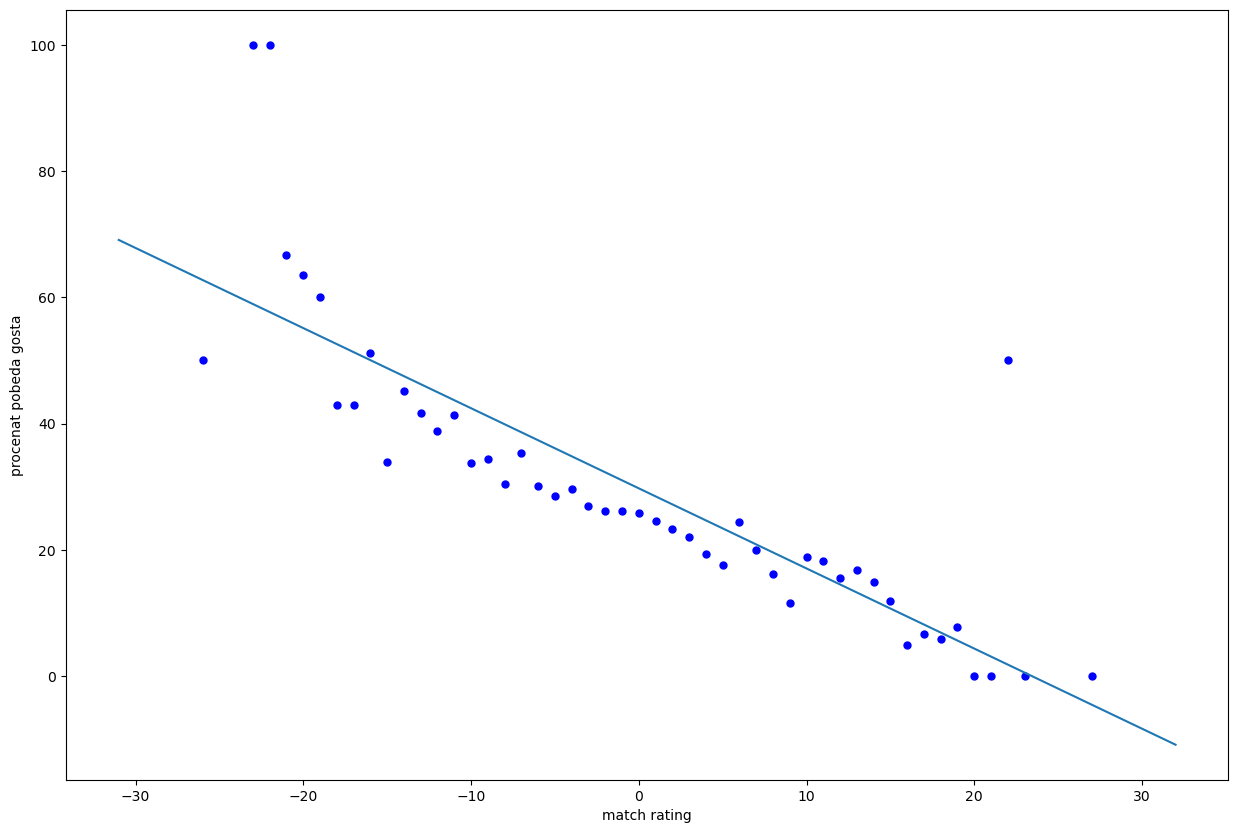

In [26]:
plot_points(x,y,'match rating','procenat pobeda gosta')

xp=np.linspace(np.min(x)-5,np.max(x)+5,100);
plt.plot(xp,np.polyval(p,xp))

In [27]:
#ako je mr 15 kolike su sanse da pobedi gostujuci tim.
print(np.polyval(p,15))

10.699643115250627


[ 0.02969177 -1.27471452 23.6445588 ]


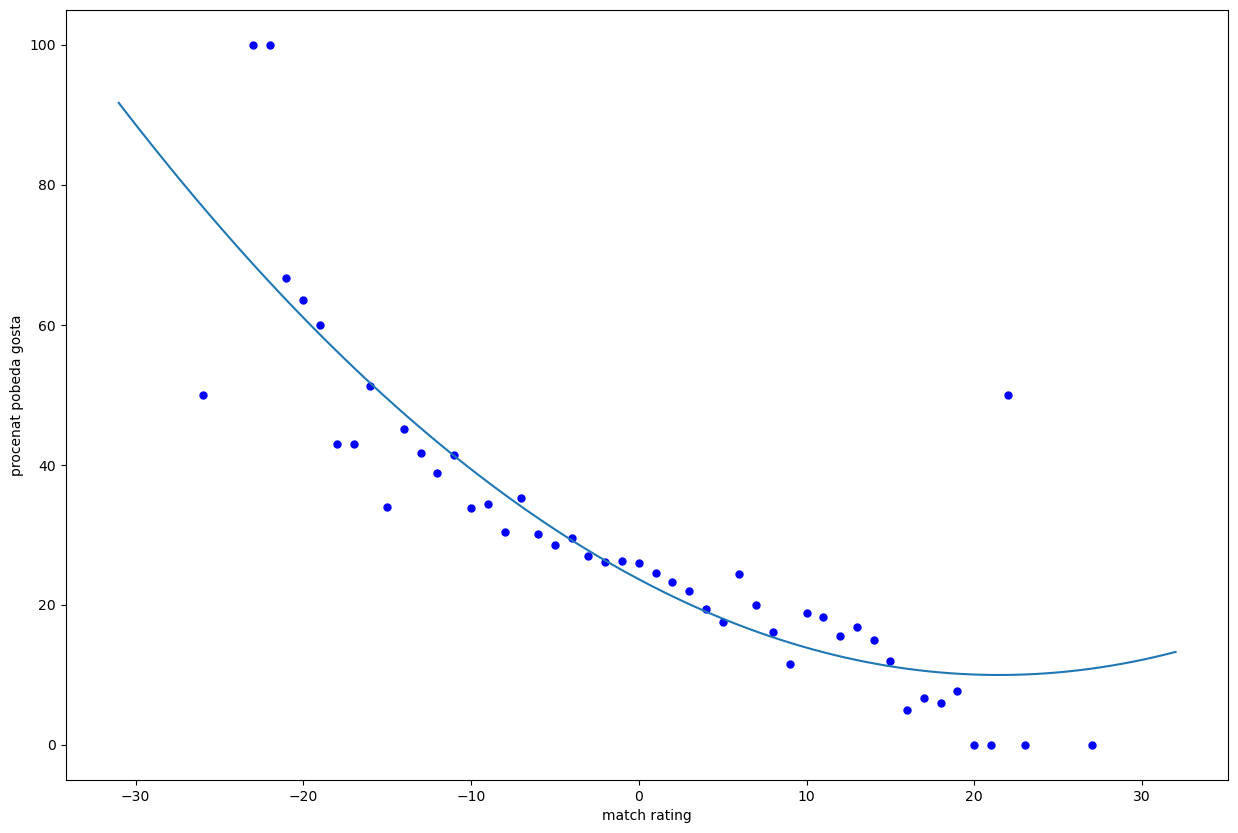

In [28]:
#koristimo kvadratni polinom

x=match_rating
y=procenat_pobeda_gosta;

p=lsquares(x, y, 2)
print(p)

plot_points(x,y,'match rating','procenat pobeda gosta');
xp=np.linspace(np.min(x)-5,np.max(x)+5,100);
plt.plot(xp,np.polyval(p,xp))

In [29]:
#ako je mr 15 kolike su sanse da pobedi gostujuci tim.
print(np.polyval(p,15))

11.204488504774542


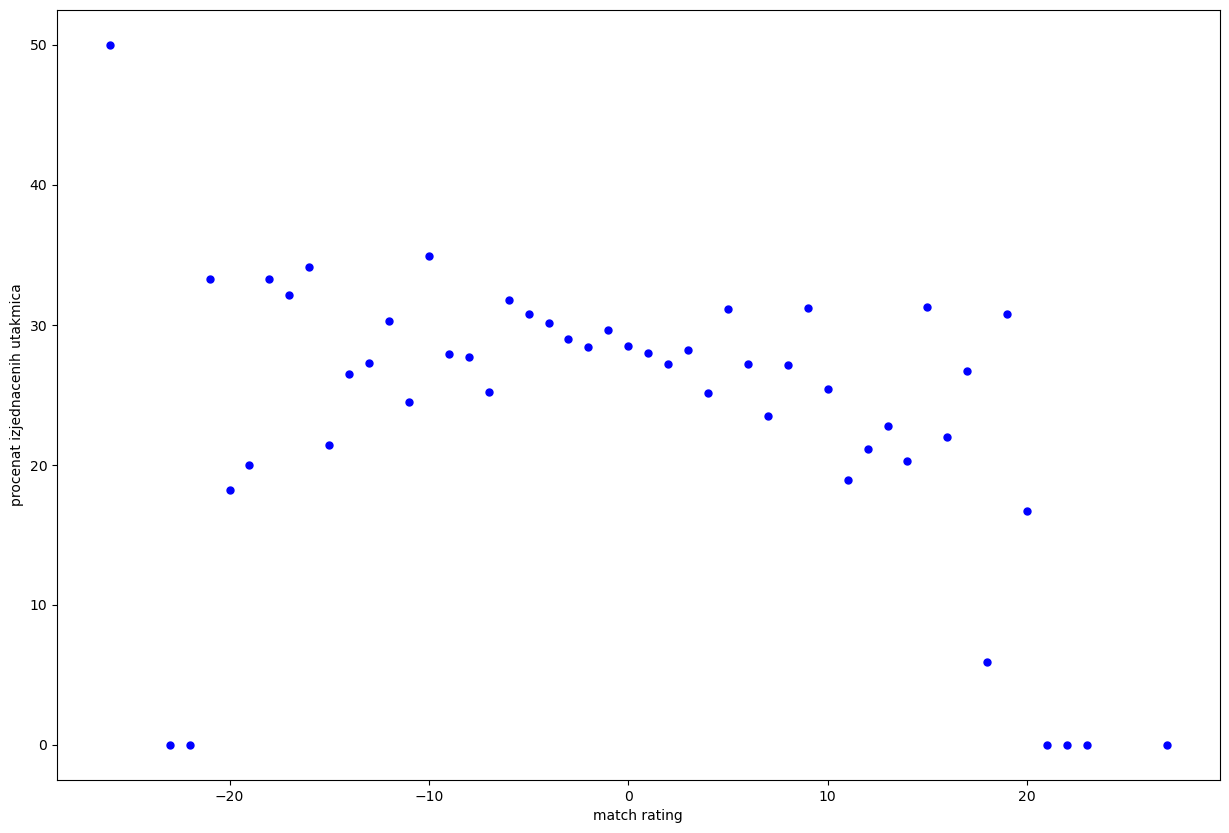

In [30]:
match_rating = data['Match_rating']
procenat_izjednacenih = data['%_of_home_draws']
plot_points(match_rating,procenat_izjednacenih,'match rating','procenat izjednacenih utakmica')

[-2.76800515e-02 -2.86197809e-01  2.94684440e+01]


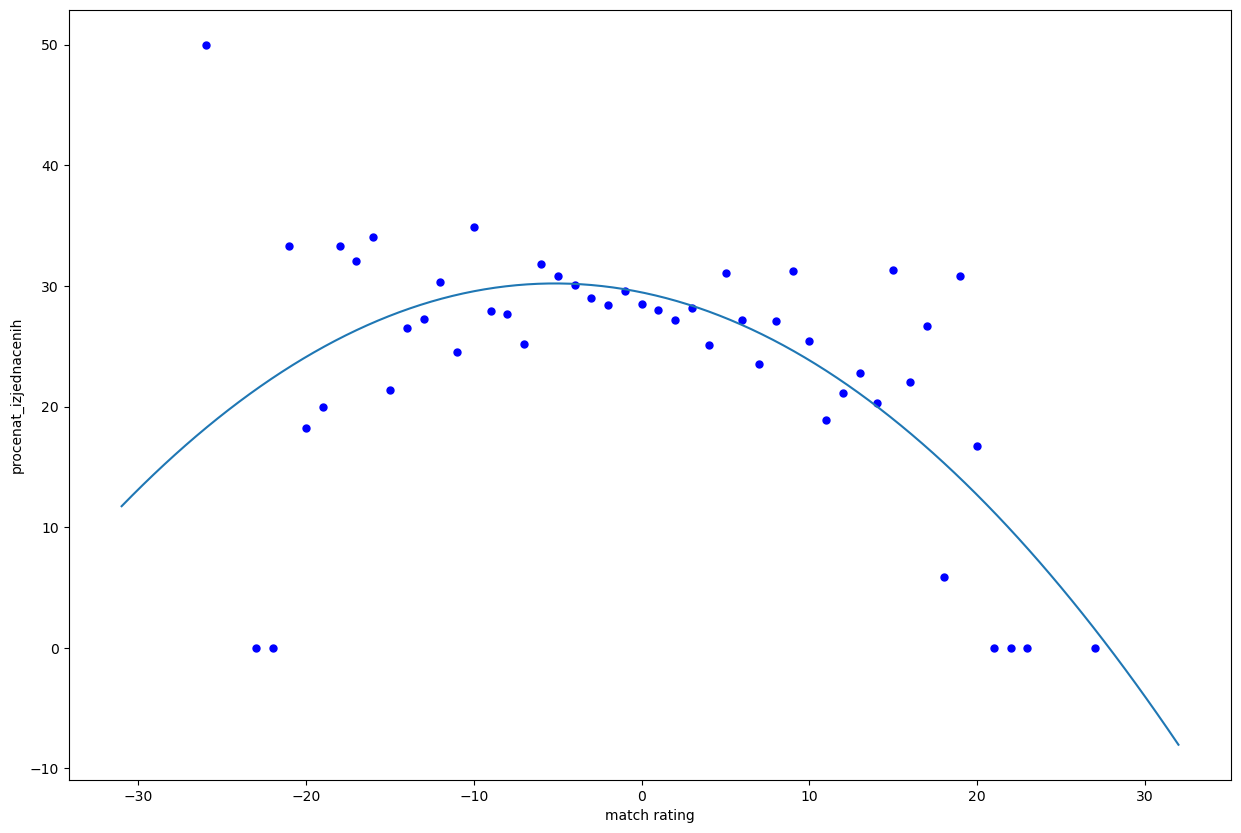

In [31]:
x=match_rating
y=procenat_izjednacenih
p=lsquares(x, y, 2)
print(p)
plot_points(x,y,'match rating','procenat_izjednacenih')

xp=np.linspace(np.min(x)-5,np.max(x)+5,100);
plt.plot(xp,np.polyval(p,xp))

In [32]:
#ako je mr 15 kolike su sanse da bude izjednaceno.
np.polyval(p,15)

18.947465266341055

## Algoritam linearne regresije

#### Iako je primer sa fudbalom zanimljiv, sam postupak linearne regresije objasnićemo na jednostavnijem primeru.
#### Dati su nam podaci o 10 planinara, o tome koliko su vremena planinarili u satima, i koliki su put prešli u kilomentrima.
#### Naš zadatak je da, pomoću linearne regresije, proverimo da li u podacima postoji neki trend, odnosno da li se na osnovu baš ovih podataka može pronaći eventualna zavisnost između pređenog puta i vremena planinarenja.

In [35]:
vreme_planinarenja = np.array([2,2,3,4,4,5,6,7,8,9]).astype(float)
predjeni_km = np.array([10,11,12,13,14,15,20,18,22,25]).astype(float)

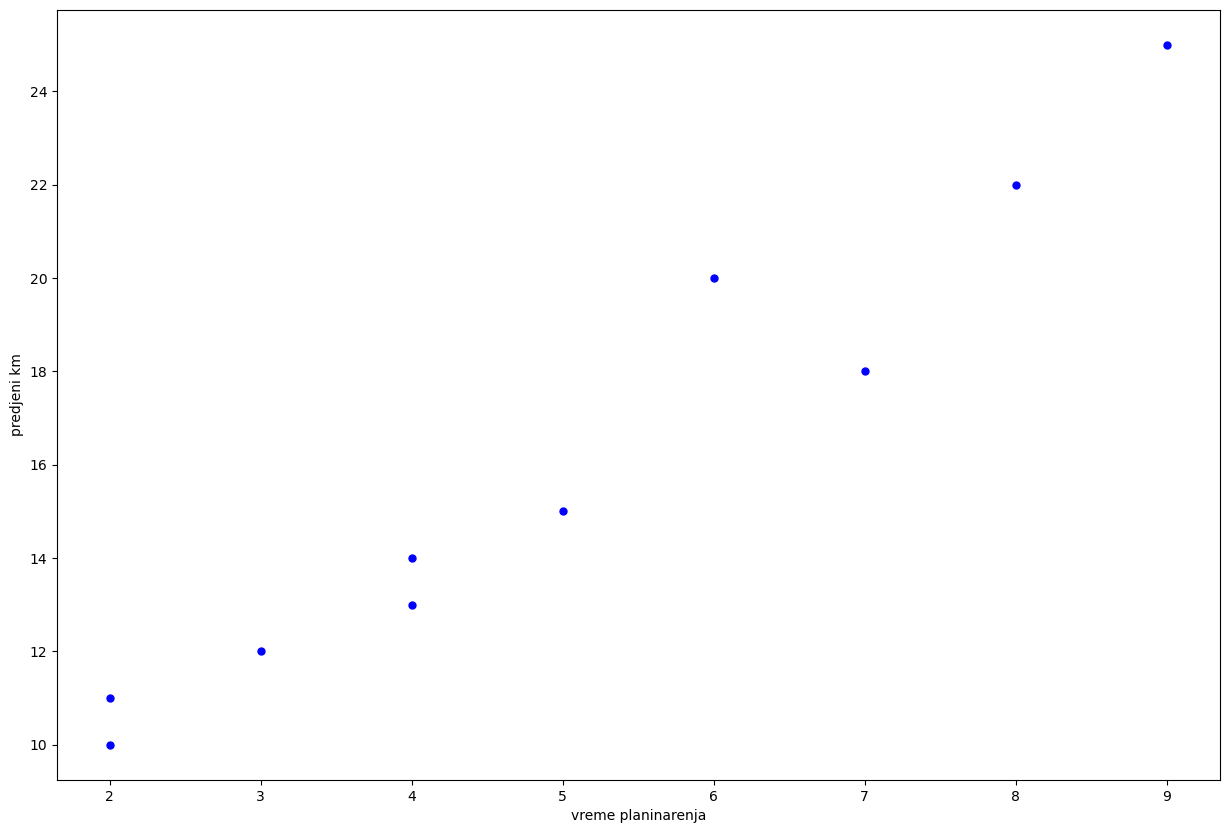

In [36]:
plot_points(vreme_planinarenja,predjeni_km,'vreme planinarenja','predjeni km')

#### Krenućemo od najednostavnijeg oblika linearne regresije, uklapanje prave u podatke.
#### Dakle, cilj nam je da odredimo pravu na osnovu datih podataka.
#### Recimo da želimo da prava prolazi kroz sve date tačke.
#### Pošto imamo jednu pravu oblika $y=kx+n$ i deset tačaka problem koji rešavamo je sistem linearnih jednačina sledećeg oblika:
#### $$kx_1+n=y_1\\kx_2+n=y_2\\kx_3+n=y_3\\kx_4+n=y_4\\kx_5+n=y_5\\kx_6+n=y_6\\kx_7+n=y_7\\kx_8+n=y_8\\kx_9+n=y_9\\kx_{10}+n=y_{10}$$

#### Vidimo da je sistem preodređen i da ne možemo da nađemo rešenje.
#### To znači da ne postoji prava koja prolazi kroz svih 10 tačaka.
#### Probaćemo da rešimo sistem tako da rezultujuća prava ne prolazi kroz svih 10 tačaka već da se u njih uklopi nabolje što može.
#### Najbolje moguće uklapanje definišemo tako što ćemo tražiti da prava koju određujemo za date tačke ima najmanji moguć zbir kvadrata grešaka. Prvo ćemo definisati šta je greška za tačku.
#### Greška $e_i$ za svaku datu tačku $x_i$ predstavlja razliku između vrednosti koju dobijemo kada $x_i$ zamenimo u pravu (koju određujemo) i vrednosti $y_i$ iz podataka (koja odgovara tački $x_i$). 
#### Ako sa $f(x)=kx+n$ označimo pravu koju određujemo, greška je definisana:
#### $$e_i=y_i-f(x_i)$$

#### Na sledećem grafiku, greška je vertikalno rastojanje između zelenih tačaka ($y_i$) i crvenih tačaka ($f(x_i)$).
#### Prava na grafiku je prava $y=2x+6$ koja je određena pomoću regresije tako da minimizuje zbir kvadrata grešaka $e_i$.

[2. 6.]


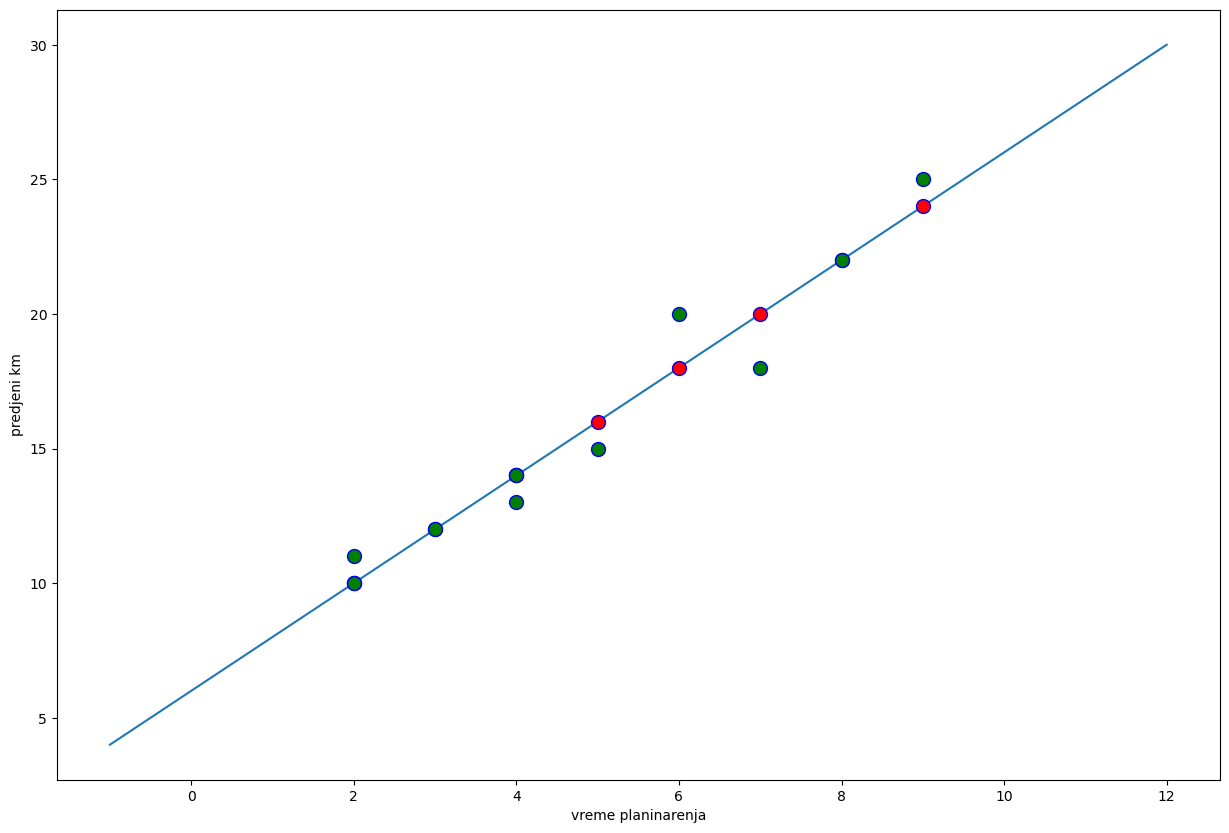

In [40]:
x=vreme_planinarenja
y=predjeni_km
p=lsquares(x, y, 1)

print(p)

plot_points(x,y,'vreme planinarenja','predjeni km')

xp=np.linspace(np.min(x)-3,np.max(x)+3,100)
plt.plot(xp,np.polyval(p,xp))

plt.plot(x,np.polyval(p,x),'ob', markersize=10, markerfacecolor='r')

plt.plot(x,y,'ob', markersize=10, markerfacecolor='g')

#### Dali smo definiciju greške za tačku, sada ćemo definisati ukupnu grešku.
#### Ukupna greška definiše se kao zbir kvadrata grešaka za tačke:
### $$SSE = \sum_{i=1}^{n}(y_i-f(x_i))^2$$
#### gde je $n$ ukupan broj datih tačaka, odnosno podataka (u našem slučaju 10).
#### Kvadrat greške koristimo zato što će nam olakšati posao prilikom traženja minimuma greške, kao što ćete videti u nastavku.
#### Šta mislite da li upotreba kvadrata greške umesto same greške može biti problematična? Kao pomoć, razmislite o tome kako izgledaju greške tačaka koje su atipične, tj. mnogo odstupaju od ostalih tačaka (npr. iskusan planinar u skupu sa "običnim" ljudima).

#### Da ponovimo sada naš cilj, tražimo pravu, tj. koeficijente $k$ i $n$ takve da je vrednost SSE minimalna.
#### To je problem traženja minimuma funkcije u 3d.

In [43]:
from regression_tools import calcluate_SSE
tmp_df = calcluate_SSE(x,y)

tmp_df.head()

,k,n,SSE
0,-10.0,-10.000000,65548.000000
1,-10.0,-9.747475,65164.799306
2,-10.0,-9.494949,64782.873992
3,-10.0,-9.242424,64402.224059
4,-10.0,-8.989899,64022.849505


Text(0.5, 0.5, 'n')

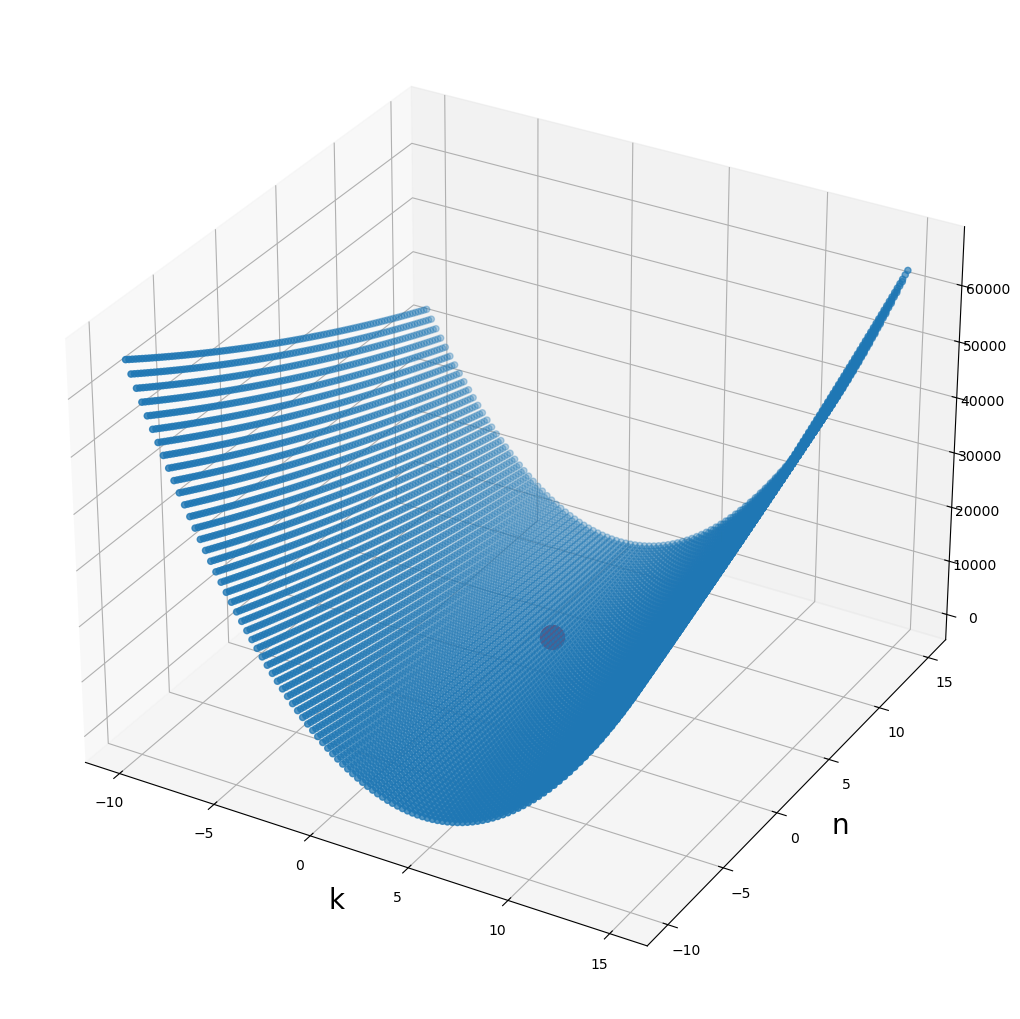

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(tmp_df['k'], tmp_df['n'], tmp_df['SSE'])
ax.scatter(2, 6, 12, s=300, c='red')
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('n', fontsize=20)

#### Za naš problem sa planinarima minimalna vrednost SSE je 12, dok je minimum u tački $k=2$ i $n=6$.
#### U nastavku ćemo pokazati na koji način smo odredili minimum funkcije SSE.

#### Minimum funkcije $SSE(k,n)$ tražimo analitički pomoću parcijalnih izvoda.
#### Oređujemo parcijalne izvode $SSE(k,n)$ po $k$ i po $n$ i izjednačavamo ih sa 0.
### $$\frac{\delta SSE(k,n)}{\delta k}=0\\\frac{\delta SSE(k,n)}{\delta n}=0$$
### $$SSE = \sum_{i=1}^{n}(y_i-f(x_i))^2\\SSE = \sum_{i=1}^{n}(y_i-(kx_i+n))^2\\SSE = \sum_{i=1}^{n}(y_i-kx_i-n)^2$$
### $$\frac{\delta SSE(k,n)}{\delta k}=2\sum_{i=1}^{n}(y_i-kx_i-n)(-x_i)=0$$
### $$\frac{\delta SSE(k,n)}{\delta n}=2\sum_{i=1}^{n}(y_i-kx_i-n)(-1)=0$$
#### Sredićemo sada malo poslednje dve jednačine:
### $$\sum_{i=1}^{n}x_i^2\cdot k+\sum_{i=1}^{n} x_i \cdot n=\sum_{i=1}^{n}y_ix_i$$
### $$\sum_{i=1}^{n} x_i \cdot k + \sum_{i=1}^{n} 1 \cdot n=\sum_{i=1}^{n}y_i$$
#### Dobili smo sistem od dve jednačine sa dve nepoznate gde sve vrednosti suma možemo da odredimo iz podataka.
#### Rešavamo sistem za naš primer sa planinarima.

In [47]:
print(x)
print(y)
sum_xi_2=np.sum(x**2)
sum_xi=np.sum(x)
sum_xi_yi=np.sum(x*y)
sum_1=np.sum(np.ones([1,len(x)]))
sum_yxi=np.sum(y)

print([sum_xi_2, sum_xi, sum_xi_yi, sum_1, sum_yxi])

[2. 2. 3. 4. 4. 5. 6. 7. 8. 9.]
[10. 11. 12. 13. 14. 15. 20. 18. 22. 25.]
[304.0, 50.0, 908.0, 10.0, 160.0]


#### Dobili smo sledeći sistem:
#### $$304\cdot k+50\cdot n=908\\50\cdot k + 10\cdot n=160$$
#### Rešavamo sistem:

In [49]:
A=np.array([[304.,50.],[50.,10.]])
b=np.array([908.,160.])
x=la.solve(A,b)

print(x)

[2. 6.]


#### Rešenje je k=2 i n=6. To znači da se u naše podatke najbolje uklapa prava:
#### $$f(x)=2x+6$$
#### Crtamo podatke i pravu.

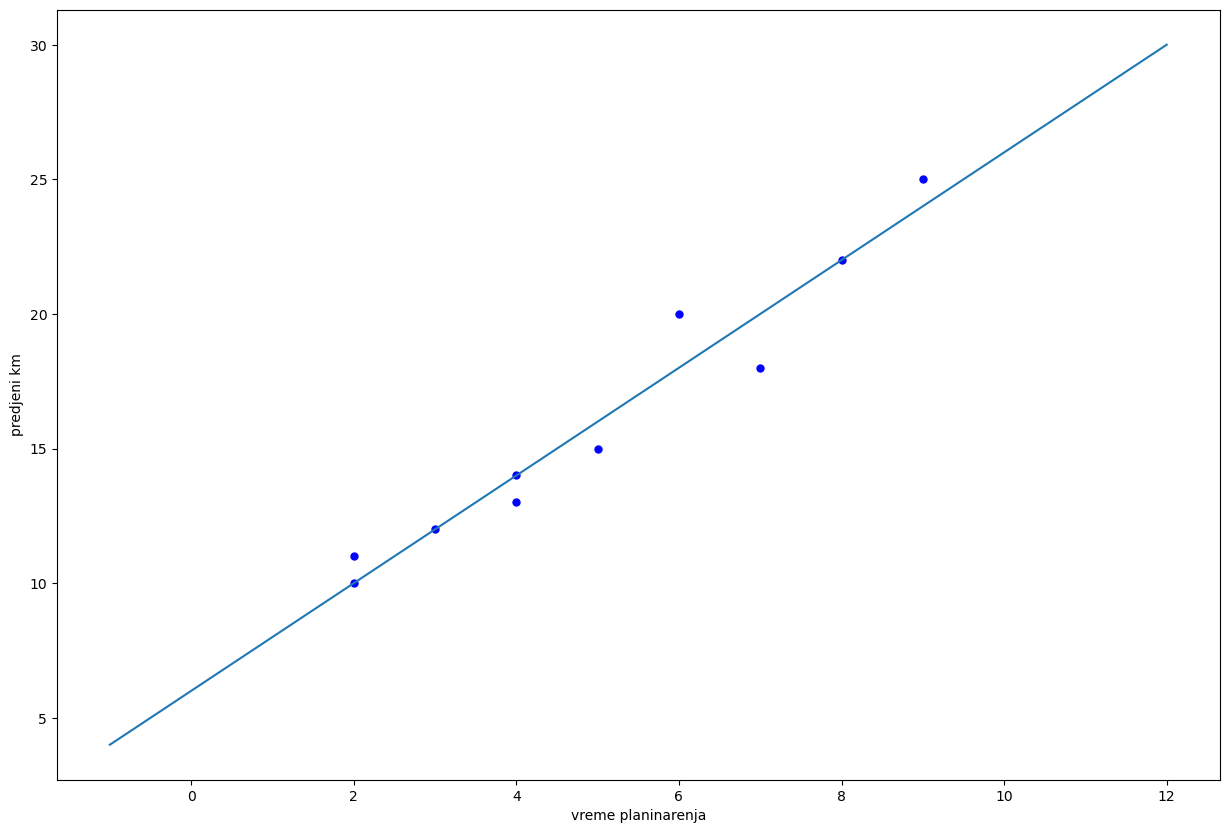

In [51]:
x=vreme_planinarenja
y=predjeni_km
plot_points(x,y,'vreme planinarenja','predjeni km');

xp=np.linspace(np.min(x)-3,np.max(x)+3,100)
plt.plot(xp,2*xp+6)

## Procena kvaliteta regresionog modela

#### Prvi korak je izračunavanje zbira kvadrata grešaka tj. SSE za naš primer.

In [53]:
SSE = np.sum((2*x+6-y)**2)
print(SSE)

12.0


#### Vidimo da je ukupna kvadratna greška 12. Greška se meri u kvadratima jedinice podatka. Dakle, naša greška je $12 km^2$.

## Prosečna kvadratna greška ($Mean$ $Square$ $Error$, $MSE$)
#### Kada imamo ukupnu kvadradnu grešku možemo da odredimo prosečnu kvadratnu grešku tako što ćemo podeliti ukupnu kvadratnu grešku sa brojem primera u skupu podataka:
### $$MSE=\frac{SSE}{n} =\frac{\sum_{i=1}^{n}(y_i-f(x_i))^2}{n}$$

In [56]:
MSE = SSE/len(x)
print(MSE)

1.2


## Standardna greška procene ($Root$ $Mean$ $Square$ $Error$, $MSE$)
#### Vrednost MSE je u kvadrat jedinice koju koristimo za y, u našem slučaju kvadratni kilometar.
#### Bilo bi zgodno da vrednost greške bude u istim jedinicama kao i vrednosti y.
#### Zato definišemo standardnu grešku procene koja predstavlja kvadratni koren iz prosečne kvadratne greške:
### $$RMSE=\sqrt{MSE}=\sqrt{\frac{\sum_{i=1}^{n}(y_i-f(x_i))^2}{n}}$$

In [58]:
RMSE = np.sqrt(MSE)
print(RMSE)

1.0954451150103321


#### Vidimo da u našem slučaju standardna greška modela je ~1km.

## Koeficijent determinacije

#### Da li je greška koju smo dobili mala, odnosno da li naš model (prava) radi dobro?
#### Svaki odgovor na ovo pitanje bio bi subjektivan.
#### Da bi dobili objektivan odgovor moramo da uporedimo pravu sa nekim drugim modelom na istim podacima.
#### Takvi modeli se tipično nazivaju osnovni modeli (*baseline models*).

#### Osnovni model u našem slučaju odabraćemo tako što ćemo se pretvarati da nemamo $x$ odnosno da nemamo informaciju o vremenu planinarenja, već samo o pređenom putu.
#### Ako nas neko pita da damo predikciju o tome koliko kilometara je prešao neki planinar, a mi pitamo koliko vremena je hodao, i dobijemo odgovor "ne znam", sve što bi mi mogli da kažemo je: "tipičan planinar po našem skupu podataka pređe 16km". 
#### Odakle nam 16km? To je prosečna vrednost za $y$ koju ćemo označiti sa $\bar{y}\$.

In [63]:
print(np.mean(y))

16.0


#### Poredimo sada predikcije naše prave sa prosekom odnosno pravom $y=16$ koja za svako $x$ predviđa uvek vrednost 16km. 

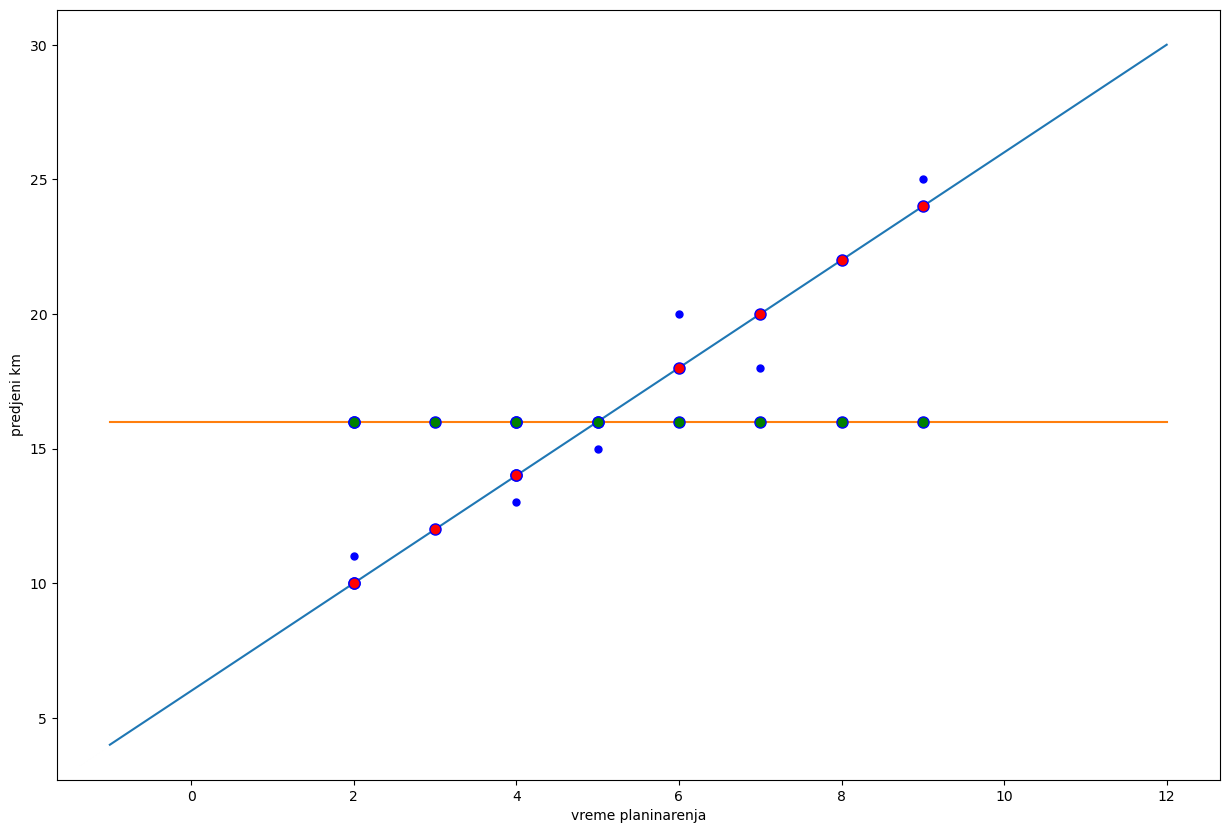

In [65]:
x=vreme_planinarenja
y=predjeni_km
plot_points(x,y,'vreme planinarenja','predjeni km')

xp=np.linspace(np.min(x)-3,np.max(x)+3,100);
plt.plot(xp,2*xp+6)

plt.plot(xp,np.ones(len(xp))*16)

plt.plot(x,2*x+6,'ob', markersize=8, markerfacecolor='r')

plt.plot(x,np.ones(len(x))*16,'ob',markersize=8, markerfacecolor='g')

#### Na prvi pogled naša prava ima bolje predikcije, ali ćemo to ipak morati da formalizujemo.
#### Definišemo sada dve sume. Prva meri koliko vrednosti $y$ odstupaju od svog proseka $\bar{y}$, odnosno koliko je prosek dobar predikcioni model:
#### $$SST = \sum_{i=1}^{n}(y-\bar{y})^2$$
#### Oznaka *SST* je iz literature i označava tolanu sumu kvadrata (*sum of squares total*). U nastavku ćemo reći zašto se koristi termin "totalna".

In [67]:
SST=np.sum((y-np.mean(y))**2)

print(SST)

228.0


#### Vidimo da za naš primer $SST$ ima vrednost $228km^2$. Na osnovu toga već možemo da tvrdimo da naš model (prava) radi jer je $SSE$ mnogo manje od $SST$. U nastavku ćemo pokazati način na koji možemo da kvalitet modela izmerimo u procentima i time dobijemo meru kvaliteta modela koja ne zavisi od jedinice merenja $y$.

#### Računamo sada razliku između predikcija naše prave i $y=\bar{y}$:
#### $$SSR = \sum_{i=1}^{n}(f(x_i)-\bar{y})^2$$
#### Oznaka *SSR* je iz literature i označava sumu kvadrata koja je rezultat regresije (*sum of squares due to regression*), odnosno pokazuje koliko se regresija razlikuje od proseka. Na slici iznad *SSR* je vertikalno rastojanje između crevenih i zelenih tačaka.

In [70]:
SSR=sum((2*x+6-np.mean(y))**2)

print(SSR)

216.0


#### Sada kada smo definisali SSR, objasnićemo zašto se SST zove totalna suma. Pod totalnom sumom misli se na ukupnu sumu rastojanja: od proseka do prave + od prave do $y$ vrednosti iz podataka:
#### $$SST=SSR+SSE$$
#### Rastojanje od proseka do vrednosti $y$ je zbir rastojanja od proseka do prave + od prave do $y$.

### Koeficijent determinacije

#### Kvalitet našeg modela izmerićemo pomoću koeficijenta determinacije ($r^2$) koji poredi koliko je naša prava (dobijena regresijom) doprinela tačnijoj predikciji y u odnosu na prosek:
#### $$r^2=\frac{SSR}{SST}$$
#### Koefcijent determinacije meri koliki procenat varijabilnosti (rastojanja) $y$ u odnosu na svoj prosek može da se objasni (predvidi) pomoću regresije sa $x$.
#### Za naš konkretan primer to bio procenat varijabilnosti pređenog puta koji je objašnjen na osnovu regresione prave po vremenu hodanja.
#### Pokazaćemo sada koje su dve ekstremne vrednosti za $r^2$.
#### Ako je predikcija našeg modela uvek prosek, tj. rezultat regresije je prava koja takođe vraća uvek prosečnu vrednost, tada je $r^2=0$ jer:
#### $$f(x_i)=\bar{y}\\SSR = \sum_{i=1}^{n}(f(x_i)-\bar{y})^2=\sum_{i=1}^{n}(\bar{y}-\bar{y})^2=0\\r^2=\frac{SSR}{SST}=\frac{0}{SST}=0$$
#### Ako je predikcija našeg modela uvek $y$, tj. rezultat regresije je prava koja prolazi kroz sve tačke $y$, tada je $r^2=1$ jer:
#### $$f(x_i)=y_i\\SSR = \sum_{i=1}^{n}(f(x_i)-\bar{y})^2=\sum_{i=1}^{n}(y_i-\bar{y})^2=SST\\r^2=\frac{SSR}{SST}=\frac{SST}{SST}=1$$
#### Izračunavamo $r^2$ za naš primer sa planinarima.

In [74]:
print(SSE)
print(SSR)
print(SST)

12.0
216.0
228.0


In [75]:
r_2=SSR/SST

print(r_2)

0.9473684210526315


#### Vidimo da je vrednost dosta blizu 1, odnosno da je ~95% varijabilnosti pređenog puta u našem skupu podatka objašneno pomoću regresije za vreme hodanja.
#### To znači da je naš model jako dobar.

## Linearna regresija za polinom proizvoljnog stepena

#### Do sada smo pokazali na koji način se pomoću linearne regresije u podatke može uklopiti prava. 
#### Sada ćemo pokzati opšti postupak pomoću koga se u podatke može uklopiti polinom proizvoljnog stepena $m$:
#### $$p(x)=\sum_{j=0}^{m}a_jx^j$$
#### Koristimo isti postupak kao i ranije. Tražimo minimum $SSE$, ali ovaj put ne za 2 parametra nego za $m+1$.
#### Napomena: u nastavku su istaknuti najvažniji koraci postupka. Kompletan postupak dat je u udžbeniku i spada u informativni deo gradiva.
### $$\frac{\delta SSE}{\delta a_0}=0\\\frac{\delta SSE}{\delta a_1}=0\\\dots\\\frac{\delta SSE}{\delta a_m}=0$$
### $$\frac{\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)^2}{\delta a_0}=0\\\frac{\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)^2}{\delta a_1}=0\\\dots\\\frac{\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)^2}{\delta a_m}=0$$
### $$2\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)(-x_i^0)=0\\2\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)(-x_i^1)=0\\\dots\\2\sum_{i=1}^{n}(y_i-\sum_{j=0}^{m}a_jx_i^j)(-x_i^m)=0$$
### $$\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j-y_i)x_i^0=0\\\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j-y_i)x_i^1=0\\\dots\\\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j-y_i)x_i^m=0$$
### $$\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j)x_i^0=\sum_{i=1}^{n}y_ix_i^0\\\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j)x_i^1=\sum_{i=1}^{n}y_ix_i^1\\\dots\\\sum_{i=1}^{n}(\sum_{j=0}^{m}a_jx_i^j)x_i^m=\sum_{i=1}^{n}y_ix^m$$
### $$\sum_{j=0}^{m}\sum_{i=0}^{n}x_i^jx_i^0a_j=\sum_{i=1}^{n}y_ix_i^0\\\sum_{j=0}^{m}\sum_{i=1}^{n}x_i^jx_i^1a_j=\sum_{i=1}^{n}y_ix_i^1\\\dots\\\sum_{j=0}^{m}\sum_{i=1}^{n}x_i^jx_i^ma_j=\sum_{i=1}^{n}y_ix_i^m$$
### Kao malu pomoć u daljem izvođenju prikazaćemo sumu $\sum_{j=0}^{m}\sum_{i=0}^{n}x_i^jx_i^0a_j$ po sabircima (suma ima $m$ sabiraka):
### $$\sum_{j=0}^{m}\sum_{i=0}^{n}x_i^jx_i^0a_j=\sum_{i=1}^{n}x_i^0x_i^0a_0+\sum_{i=0}^{n}x_i^1x_i^0a_1+\dots+\sum_{i=0}^{n}x_i^mx_i^0a_m$$

#### Ako posmatramo na primer $x^0$ i $x^1$ vidimo da je suma $\sum_{i=0}^{n}x_i^0x_i^1$ ustvari skalarni proizvod ta dva vektora koji se može dobiti tako što se jedan od vektora uzme kao vrsta, a drugi kao kolona i onda se primeni množenje matrica:
#### $$\begin{bmatrix}x_1^1 & x_2^1 & \dots  & x_n^1\end{bmatrix}_{1\times n}*\begin{bmatrix}x_1^0\\x_2^0\\\dots\\x_n^0\end{bmatrix}_{n\times 1}=\sum_{i=1}^{n}x_i^0x_i^1$$

#### To znači da se sve sume $\sum_{i=0}^{n}x_i^jx_i^k$ gde je $k={0,1,2,\dots,m}$ iznad mogu dobiti kao proizvod matrica:
#### $$A^T*A$$
#### $$A^T=\begin{bmatrix}x_1^0 & x_2^0 & \dots & x_n^0\\ x_1^1 & x_2^1 &\dots & x_n^1 \\ \dots \\ x_1^m & x_2^m & \dots & x_n^m \end{bmatrix}_{m+1\times n}A=\begin{bmatrix}x_1^0 & x_1^1 & \dots & x_1^m\\ x_2^0 & x_2^1 &\dots & x_2^m \\ \dots \\ x_n^0 & x_n^1 & \dots  & x_n^m \end{bmatrix}_{n\times m+1}$$

#### Ako sada u proizvod matrica $A^TA$ ubacimo i vektor nepoznatih koeficijenata polinoma $a=(a_0,a_1,\dots,a_m)$ sve sume oblika $\sum_{j=o}^{m}\sum_{i=0}^{n}x_i^jx_i^ka_j$ gde je $k={0,1,2,\dots,m}$ mogu se dobiti kao sledeći prozivod matrica:
#### $$A^T*A*a$$
#### Dodajemo dimenzionalnosti matrica i vektora u proizvod:
#### $$A^T_{m+1\times n}*A_{n\times m+1}*a_{m+1\times 1}$$
$$A^T=\begin{bmatrix}x_1^0 & x_2^0 & \dots & x_n^0\\ x_1^1 & x_2^1 &\dots & x_n^1 \\ \dots \\ x_1^m & x_2^m & \dots & x_n^m \end{bmatrix}_{m+1\times n}A=\begin{bmatrix}x_1^0 & x_1^1 & \dots & x_1^m\\ x_2^0 & x_2^1 &\dots & x_2^m \\ \dots \\ x_n^0 & x_n^1 & \dots  & x_n^m \end{bmatrix}_{n\times m+1}*\begin{bmatrix}a_0\\a_1\\\dots \\a_m\end{bmatrix}_{m+1\times 1}$$

#### Na sličan način, sve sume oblika $\sum_{i=1}^{n}y_ix_i^k$ gde je $k={0,1,2,\dots,m}$ mogu se dobiti kao proizvod vektora $y=(y_1,y_2,\dots,y_n)$ i matrice $A^T$:
$$A^T=\begin{bmatrix}x_1^0 & x_2^0 & \dots & x_n^0\\ x_1^1 & x_2^1 &\dots & x_n^1 \\ \dots \\ x_1^m & x_2^m & \dots & x_n^m \end{bmatrix}_{m+1\times n}*\begin{bmatrix}y_1\\y_2\\\dots\\y_n\end{bmatrix}_{n\times 1}$$

#### Iz prethodnog dobijamo da se problem određivanja polinoma: $$p(x)=\sum_{j=0}^{m}a_jx^j$$ koji se najbolje ukalpa u podatke $(x_1,y_1),(x_2,y_2)\dots(x_n,y_n)$ svodi na rešavanje sledećeg sistema:
#### $$(A^TA)a=A^Ty$$

#### Napisaćemo sada kod koji za date podatke i stepen polinoma m formira matricu A i rešava sistem prikazan u prethodom redu.

In [85]:
def lsquares(x,y,stepen):
    n=len(x)
    A=np.zeros([n,stepen+1])

    for i in range(n):
        for j in range(stepen+1):
            A[i,j]=x[i]**j

    p=la.solve(np.matmul(A.T, A), np.matmul(A.T, y.T))
    p=np.flip(p)
    
    return p

In [86]:
#flip radimo zato što je polinom definisam tako da je a0 slobodan član, pa a1 uz x^1 itd.
#Tako da je onda poslednji član polinoma p pre flip onaj koji je uz najveći stepen.
#Nakon flip posldenji član dolazi na prvo mesto itd. pa onda polinom možemo dalje da korsitmo u Pythonu.

In [87]:
print(np.flip([0,1,2,3,4])) 

[4 3 2 1 0]


In [88]:
x=vreme_planinarenja
y=predjeni_km

p=lsquares(x,y,1)

print(p)

[2. 6.]


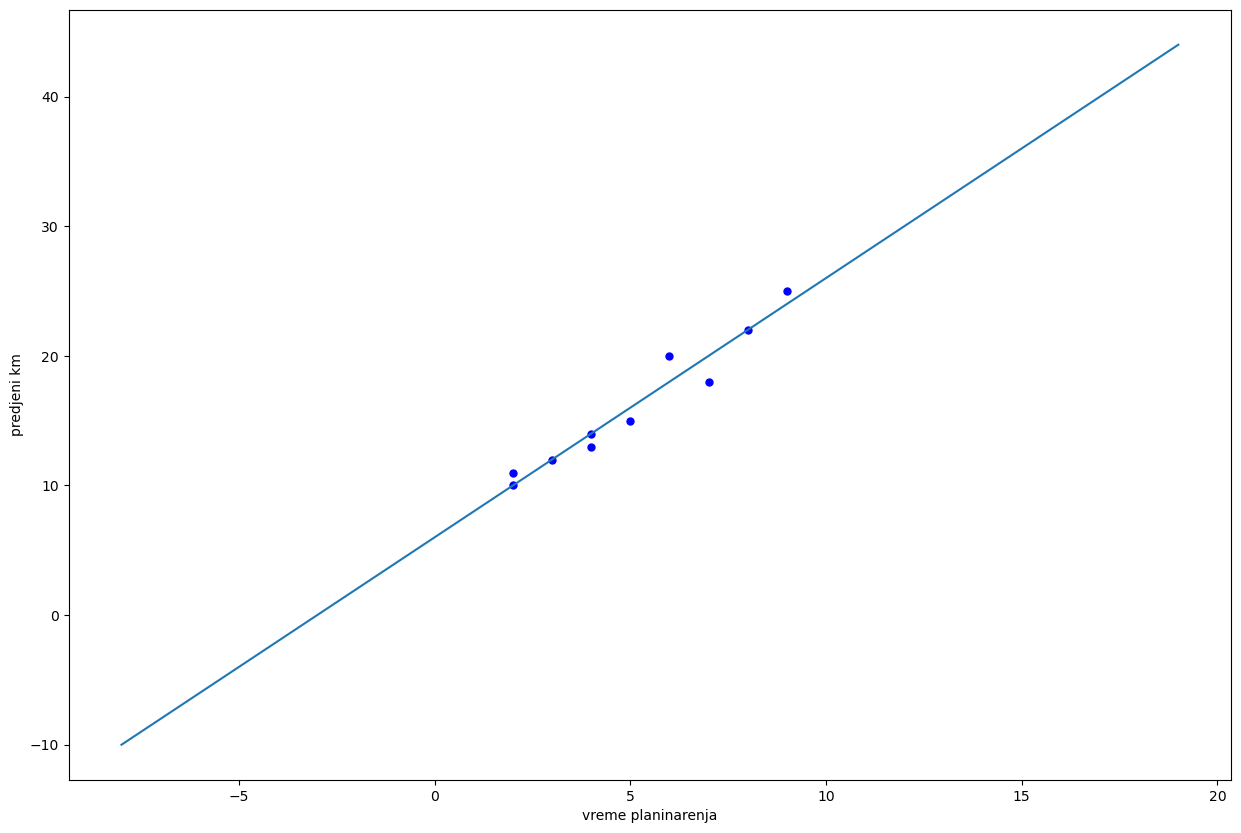

In [89]:
plot_points(x,y,'vreme planinarenja','predjeni km')

xp=np.linspace(np.min(x)-10,np.max(x)+10,100)
plt.plot(xp,np.polyval(p,xp))

[0.08241758 1.12087912 7.89010989]


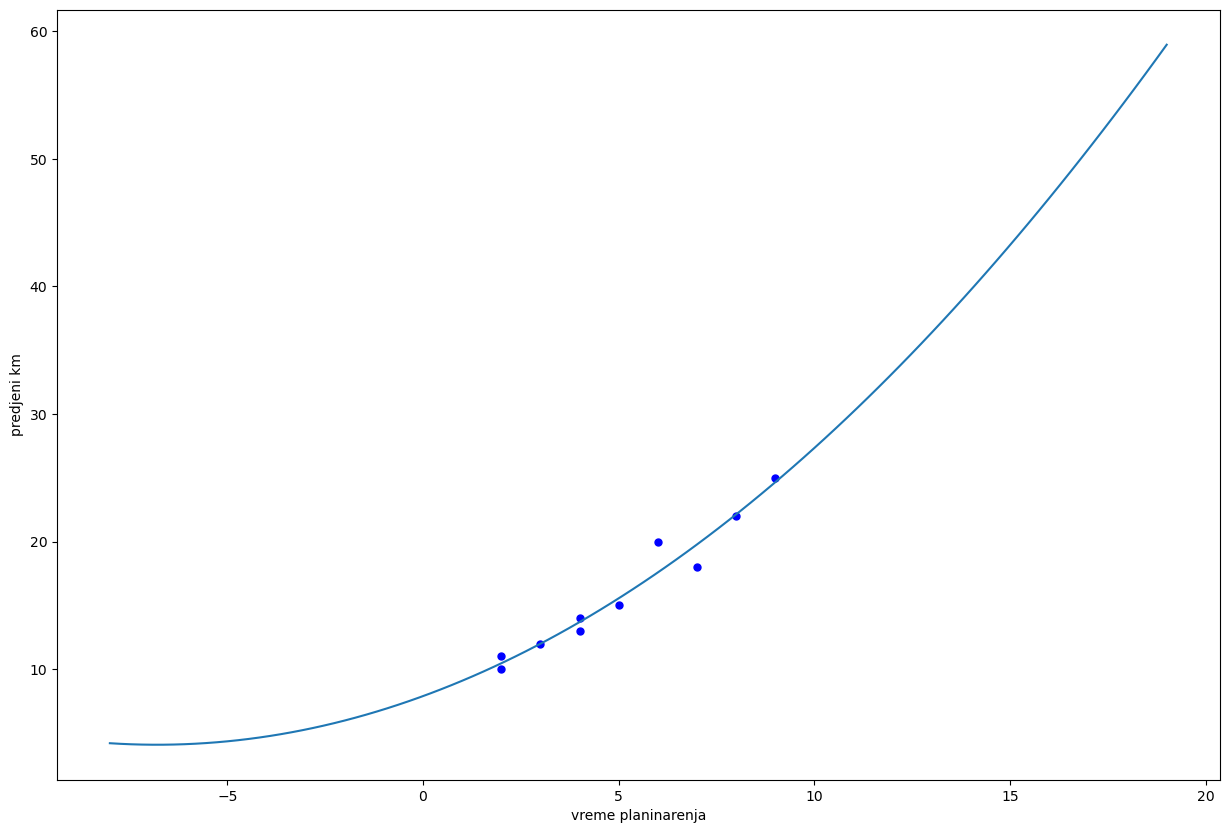

In [90]:
p=lsquares(x,y,2)
print(p)

plot_points(x,y,'vreme planinarenja','predjeni km')

xp=np.linspace(np.min(x)-10,np.max(x)+10,100)
plt.plot(xp,np.polyval(p,xp))

#### Linearna regresija pomoću polinoma je samo specijalan slučaj linearne regresije za funkcije oblika $y=x^i$. Zašto?
#### Rezultat linearne regresije je linearna kombinacija koeficjenata i funkcija. Funkcije zadajemo, a koeficijente određujemo rešavanjem sistema koji formiramo na način na koji smo pokazali iznad.
#### Linearna regresija može se raditi za bilo koje funkcije $f_1(x),f_2(x),\dots,f_m(x)$, a tada matrica ima oblik:
#### $$A=\begin{bmatrix}f_0(x_1) & f_1(x_1) & \dots & f_m(x_1)\\f_0(x_2) & f_1(x_2) &\dots & f_m(x_2) \\ \dots \\ f_0(x_n) & f_1(x_n) & \dots  & f_m(x_n) \end{bmatrix}$$

#### Funkcija koja je data u nastavku deo je informativnog gradiva, a pomoću nje je moguće uraditi linearnu regresiju za proizvoljan niz funkcija.

In [93]:
def lsquares_general(x,y,functions):
    n=len(x)
    m=len(functions)
    A=np.zeros([n,m])
    for i in range(n):
        for j in range(m):
            A[i,j]=functions[j](x[i])
    
    p=la.solve(np.matmul(A.T, A), np.matmul(A.T, y.T))
    
    return p

In [94]:
x=vreme_planinarenja
y=predjeni_km

p=lsquares_general(x,y,[lambda x: x,lambda x: 1])

print(p)

[2. 6.]


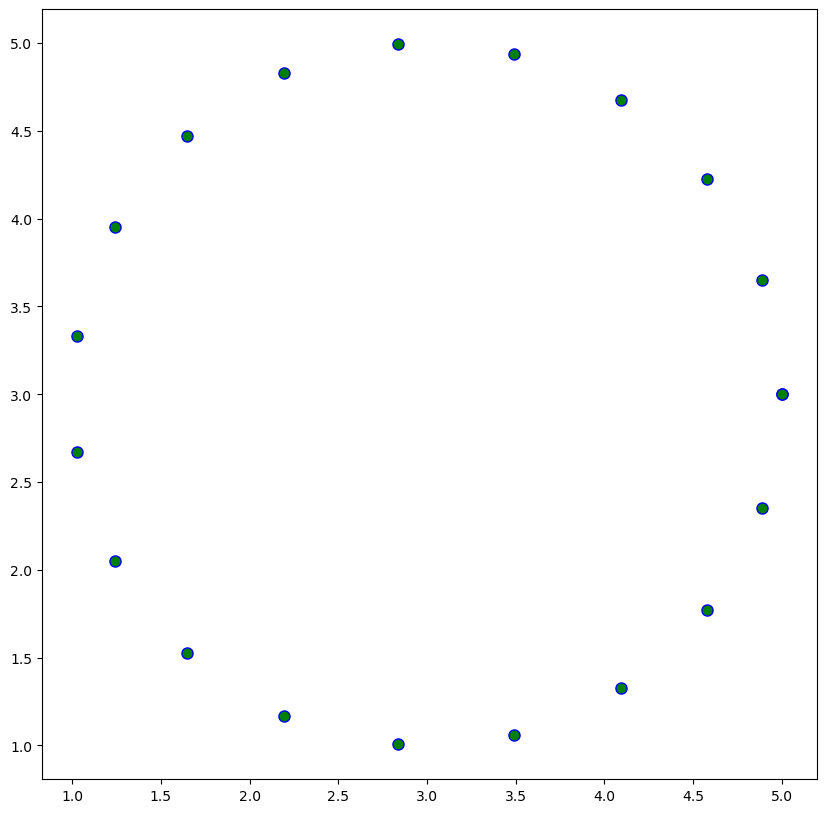

In [95]:
x_coor=y_coor=3 #centra kruga
r=2 #poluprečnik
t = np.linspace(0,2*np.pi,20).T
circsx = r*np.cos(t) + x_coor 
circsy = r*np.sin(t) + y_coor

fig = plt.figure(figsize=(10, 10))
plt.plot(circsx,circsy,'ob', markersize=8, markerfacecolor='g')

#za objаšnjenje pogledati definiciju sinusa i konsinusa na jediničnom krugu
#za tačku (x,y) na jediničnom krugu koja odgovara uglu t važi x=cos(t), a y=sin(t)
#pomeramo koordiante za zadati centar i množimo sa r ako ne želimo baš jedinični krug

In [96]:
x=np.linspace(0,2*np.pi,20)
y=circsy

In [97]:
aproks=lsquares_general(x,y,[lambda x: np.sin(x), lambda x: 1]) 
#u ovom slučaju znamo da je vrednost y dobijena pomoću funkcije sin(x) pa prosleđujemo tu funkciju kao deo ulaznih parametara

In [98]:
print(aproks)

[2. 3.]


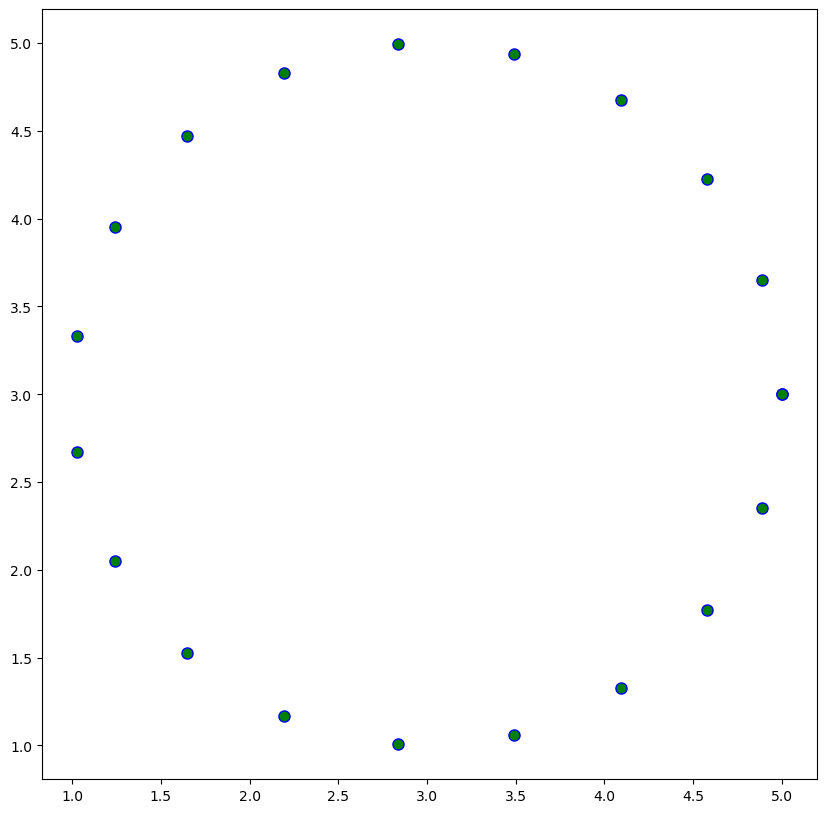

In [99]:
fig = plt.figure(figsize=(10, 10))

plt.plot(circsx,circsy,'ob', markersize=8, markerfacecolor='g')

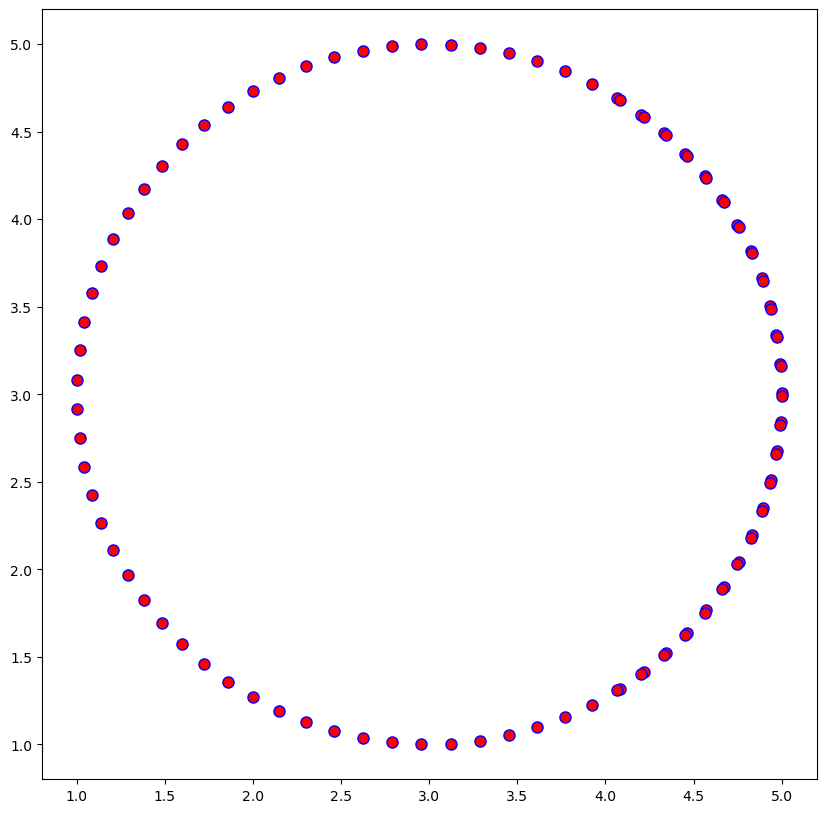

In [100]:
fig = plt.figure(figsize=(10, 10))

xp=np.linspace(np.min(x)-1,np.max(x)+1,100)
circsxp = r*np.cos(xp) + x_coor

tmp = aproks[0]*np.sin(xp)+aproks[1] #koristimo rezultate regresije da dobijemo vrednosti za y, odnosno y-koordinate tačkaka koje odgovaraju circxp koordinatama

plt.plot(circsxp,tmp,'ob', markersize=8, markerfacecolor='r')